In [1]:
import astropy.io.fits as pf
data = pf.getdata('ammonia_model.fits') #intensity, frequency, velocity
header = pf.getheader('ammonia_model.fits')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(header['VSTART'],header['VSTART']+1980*header['VDELT'],header['VDELT'])
h = 6.62607015*10**-34
k = 1.380649*10**-23
nu = 23694495500.0
T_bg = 2.726

def J(T):
    return (h*nu/k)/(np.e**(h*nu/(k*T))-1)

def gaussian(x,intensity,center,sigma):
    return intensity*np.e**(-(x-center)**2/sigma**2)

In [3]:
intensity = data[0]
frequency = data[1]
velocity = data[2]
    
def opacity(xarr,tau,delta_v,v_c):
    opacity = np.zeros_like(xarr)
    for i in range(18):
        opacity += tau*intensity[i]*np.e**(-((xarr - velocity[i] - v_c)/(2*delta_v))**2)
    return opacity

def ammonia_model(xarr,o,v_c,v_w,T_ex):
    return (J(T_ex)-J(T_bg))*(1-np.e**(-opacity(xarr,o,v_w,v_c)))

def spectra_model(xarr,params):
    '''
    params[0] = opacity
    params[1] = velocity centroid 
    params[2] = velocity width
    params[3] = excitation temperature
    '''
    test = np.zeros((18,len(xarr))) #18 hyperfine features
    spectra = np.zeros_like(xarr)
    for i in range(18):
        test[i] = gaussian(xarr,intensity[i],velocity[i],params[2])
        spectra += test[i]
    return spectra

Text(0, 0.5, 'Intensity')

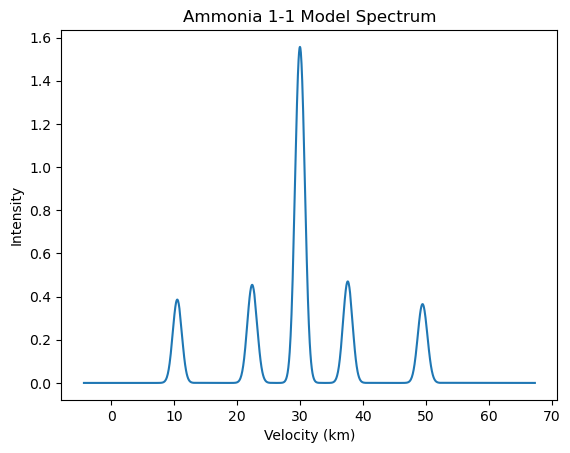

In [4]:
#test
parameters = [0.5,30,0.5,10] #change this list only
y_arr = ammonia_model(x_arr,*parameters)
plt.plot(x_arr,y_arr)
plt.title('Ammonia 1-1 Model Spectrum')
plt.xlabel('Velocity (km)')
plt.ylabel('Intensity')

[0.5, 30, 0.5, 10] [ 0.737 29.994  0.484  7.976] [0.152 0.01  0.008 0.939]


Text(0, 0.5, 'Intensity')

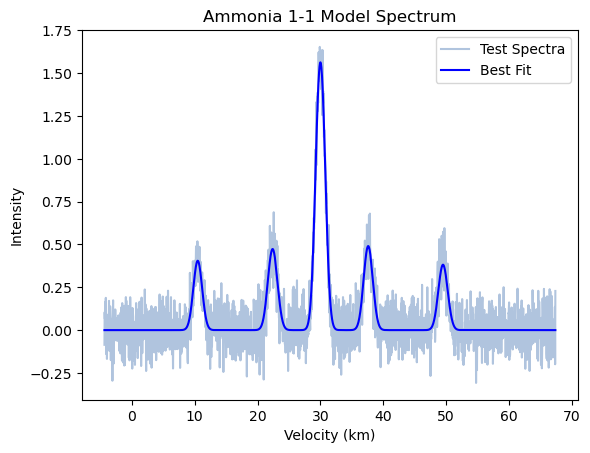

In [5]:
#test fitting

#params[0] = opacity
#params[1] = velocity centroid 
#params[2] = velocity width
#params[3] = excitation temperature

#Change this part only
test_params = [0.5,30,0.5,10] #this is the answer
bounds = [[0.0,25,0.036,T_bg],[100,35,2,20]] #these are the lower and upper bounds of the guesses
error_scale = 0.1 #set this to whatever you want the error to be

#Fitting code
from scipy.optimize import curve_fit
test_spectra = ammonia_model(x_arr,*test_params) + np.random.normal(loc = 0, scale = error_scale, size = len(x_arr))
vmax = x_arr[np.argmax(test_spectra)]
popt, pcov = curve_fit(ammonia_model,x_arr,test_spectra,p0 = (0.5,vmax,0.5,3),method='trf',bounds = bounds,maxfev=10000)
np.set_printoptions(precision=3)
print(test_params,popt,np.sqrt(np.diag(pcov))) #answer, fitting results, fitting error

plt.plot(x_arr,test_spectra,label='Test Spectra', color='lightsteelblue')
plt.plot(x_arr,ammonia_model(x_arr,*popt),label='Best Fit',color='blue')

#plt.fill_between(x_arr,ammonia_model(x_arr,*(popt+np.sqrt(np.diag(pcov)))),ammonia_model(x_arr,*(popt-np.sqrt(np.diag(pcov)))),color='red',alpha=0.5)
#error

plt.legend()
plt.title('Ammonia 1-1 Model Spectrum')
plt.xlabel('Velocity (km)')
plt.ylabel('Intensity')